In this project, I analyzed ecommerce web traffic using proprietary data. I used K-Means Clustering to segment customers into groups based on similar features. I then communicate the patterns found in this analysis.

I have redone the project with dummy data to demonstrate the steps I performed. I hope you try it out yourself!

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The first step is to create the dataset and fill it with data. Then, save it to a CSV file.

In [ ]:
# Creating a dataframe and filling it with dummy data
df = pd.DataFrame({
    'Name': np.random.choice(['Sally', 'George', 'John', 'Suzy', 'Ella', 'Trevor'], size=100),
    'Age': np.random.randint(20, 60, size=100),
    'Income': np.random.randint(30000, 120000, size=100),
    'Total purchases in the last 100 days': np.random.randint(0, 40, size=100),
    'Average order value': np.random.randint(10, 100, size=100),
    'Time spent on website': np.random.randint(1, 100, size=100)
})

# Saving the dataframe as a csv file
df.to_csv('customerData_dummy.csv', index=False)

The next step is to define the k-means clustering algorithm and fit it to the data.

However, first the optimal value for K must be determined. To do so, I used the elbow method. My implementation of the elbow method included calculating the inertia for different values of K and plotting them.

In [ ]:
# Importing necessary libraries/modules
from sklearn.cluster import KMeans

In [ ]:
# Removing the categorical columns
df = df.drop(['Name'], axis=1)

Text(0.5, 0, 'Number of Clusters (k)')

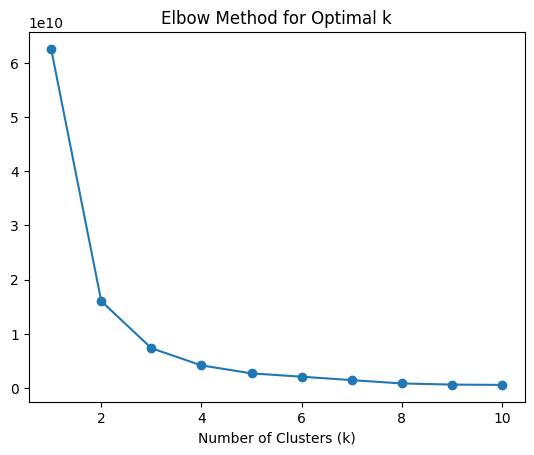

In [ ]:
# Calculate inertia for different values of k from 1 to 11 clusters
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')

Based on this method, it appears that 3 is the optimal number of clusters for this specific data. The graph is honestly surprisingly clear for being made up of random data.

The next step is to implement the k-means clustering algorithm with the selected K.

In [ ]:
# Creating a KMeans object with the calculated value for K
kmeans = KMeans(n_clusters=3)

# Fitting the model to the data
kmeans.fit(df)

# Getting the cluster labels for each data point
labels = kmeans.labels_

# Adding the labels to the DataFrame
df['cluster'] = labels

# Print the DataFrame with cluster assignments
print(df)

    Age  Income  Total purchases in the last 100 days  Average order value  \
0    31   67074                                    10                   72   
1    33   45148                                    34                   41   
2    28   91721                                    21                   38   
3    50  102316                                    27                   81   
4    45   75520                                    24                   42   
..  ...     ...                                   ...                  ...   
95   37   36361                                    11                   64   
96   58   69362                                    10                   96   
97   25   58580                                     5                   87   
98   41   73426                                    32                   35   
99   31   47571                                    31                   25   

    Time spent on website  cluster  
0                      83 

In [ ]:
# Calculating and displaying the centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[4.09354839e+01 7.47612581e+04 1.84193548e+01 5.20322581e+01
  5.69032258e+01]
 [3.89354839e+01 1.02576645e+05 2.04516129e+01 4.84838710e+01
  5.59354839e+01]
 [4.12105263e+01 4.58112895e+04 1.86842105e+01 5.90000000e+01
  4.85263158e+01]]


The next step is to visualize the results. In this instance, a scatter plot will be used.

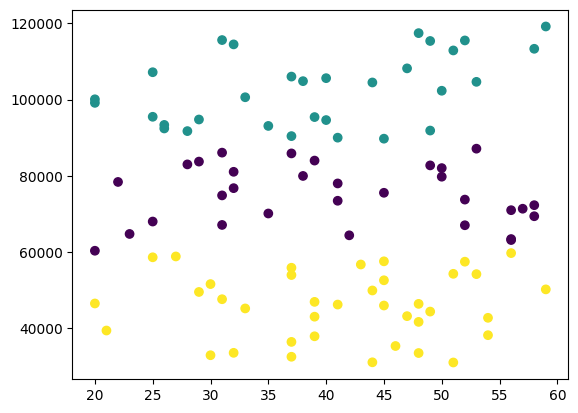

In [ ]:
# Visualizing results with a scatter plot
plt.scatter(df['Age'], df['Income'], c=labels)

The next step is to view each cluster and make note of specific traits in them

In [ ]:
df[df['cluster'] == 0].describe()

,Age,Income,Total purchases in the last 100 days,Average order value,Time spent on website,cluster
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,40.935484,74761.258065,18.419355,52.032258,56.903226,0.0
std,12.055249,7759.305132,9.932352,22.498124,28.937121,0.0
min,20.000000,60300.000000,3.000000,16.000000,8.000000,0.0
25%,31.000000,68666.000000,10.500000,35.500000,31.500000,0.0
50%,41.000000,74835.000000,17.000000,49.000000,56.000000,0.0
75%,52.000000,81517.000000,28.000000,69.500000,84.500000,0.0
max,58.000000,87105.000000,38.000000,96.000000,98.000000,0.0


In [ ]:
df[df['cluster'] == 1].describe()

,Age,Income,Total purchases in the last 100 days,Average order value,Time spent on website,cluster
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,38.935484,102576.645161,20.451613,48.483871,55.935484,1.0
std,11.030066,9454.948555,10.689056,23.517187,32.255165,0.0
min,20.000000,89730.000000,0.000000,11.000000,3.000000,1.0
25%,30.000000,93981.000000,14.000000,28.000000,29.000000,1.0
50%,39.000000,102316.000000,20.000000,43.000000,50.000000,1.0
75%,48.500000,110547.500000,27.000000,68.500000,90.000000,1.0
max,59.000000,119194.000000,38.000000,88.000000,98.000000,1.0


In [ ]:
df[df['cluster'] == 2].describe()

,Age,Income,Total purchases in the last 100 days,Average order value,Time spent on website,cluster
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,41.210526,45811.289474,18.684211,59.000000,48.526316,2.0
std,9.989611,8782.836921,10.984277,25.954222,25.961236,0.0
min,20.000000,30957.000000,0.000000,10.000000,1.000000,2.0
25%,34.000000,38433.500000,10.000000,37.250000,26.250000,2.0
50%,43.500000,46258.000000,20.000000,67.000000,49.000000,2.0
75%,48.000000,53576.750000,28.750000,79.000000,69.500000,2.0
max,59.000000,59683.000000,35.000000,97.000000,93.000000,2.0


As seen from the data:


1.   First cluster: Varying age groups, (mean 40), higher income (mean 75k), average purchases in last 100 days (mean 18), middling average order value (mean 52), average amount of time of website (mean 56).
2.  Second cluster: Varying age groups, (mean 38), high income (mean 103k), average purchases in last 100 days (mean 18), middling average order value (mean 52), average amount of time of website (mean 56).
3. Third cluster: Varying age groups, (mean 41), lower income (mean 48k), average purchases in last 100 days (mean 19), higher average order value (mean 59), lower amount of time of website (mean 48).

This data will be used to help define characteristics of each cluster in the report attached with this notebook.
